# Credit Card Fraud Detection 

## importing libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Data preparation and Data preprocessing 

## importing dataset 

In [3]:
dataset=pd.read_csv('creditcard.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### counting the numbers of fraud detection from the dataset 

In [5]:
dataset.Class[dataset.Class==1].count()

492

In [6]:
checking_fraud=dataset[dataset.Class==1]

In [7]:
a=checking_fraud.iloc[:,:-1].values
b=checking_fraud.iloc[:,-1].values

## Checking for missing values 

In [7]:
dataset.info()# no missing values in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Visualising Data 

Text(0.5, 1.0, 'Credit Card Fraud Detection')

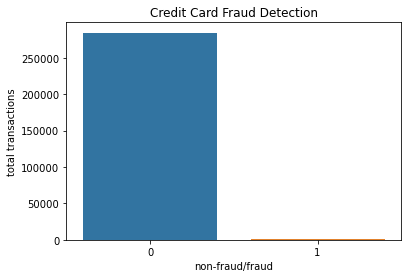

In [9]:
sb.countplot(x='Class',data=dataset)
plt.xlabel('non-fraud/fraud')
plt.ylabel('total transactions')
plt.title('Credit Card Fraud Detection')

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sb.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=False)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

## Splitting dataset into training and test set 

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Feature Scaling 

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
a=sc.transform(a)

## Applying PCA 

In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=27)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
a=pca.transform(a)

In [11]:
pca.explained_variance_ratio_

array([0.06556282, 0.05625885, 0.03487239, 0.03457228, 0.03402153,
       0.03387878, 0.03375796, 0.03371   , 0.0336157 , 0.03358304,
       0.03355378, 0.03351797, 0.03348022, 0.03342609, 0.03341524,
       0.03337844, 0.03336233, 0.03332231, 0.03326322, 0.03323613,
       0.03321712, 0.0332038 , 0.03317882, 0.0331393 , 0.0329708 ,
       0.03250194, 0.03178297])

In [12]:
np.cumsum(pca.explained_variance_ratio_)

array([0.06556282, 0.12182167, 0.15669406, 0.19126634, 0.22528787,
       0.25916665, 0.29292461, 0.32663462, 0.36025031, 0.39383335,
       0.42738714, 0.46090511, 0.49438533, 0.52781142, 0.56122666,
       0.5946051 , 0.62796743, 0.66128974, 0.69455296, 0.72778909,
       0.76100621, 0.79421002, 0.82738884, 0.86052814, 0.89349894,
       0.92600088, 0.95778385])

## Training Random Forest Model on training dataset 

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

## confusion matrix 

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[56853     8]
 [   19    82]]


0.9995259997893332

## Predicting fraud transactions 

In [18]:
a_pred=classifier.predict(a)# checking all the fraud transactions from the trained model.
a_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

C:\Users\dns\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Fraud detection')

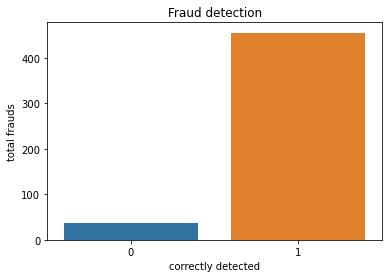

In [33]:
sb.countplot(a_pred)
plt.ylabel('total frauds')
plt.xlabel('correctly detected')
plt.title('Fraud detection')

## K-fold Cross Validation 

K-fold cross validation shows how good your sampled data in the training and test set. 

In [20]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(classifier,X=X_train,y=y_train,cv=10)
print(f"Accuracy {accuracies.mean()*100:.2f} %")
print(f"Standard deviation {accuracies.std()*100:.2f} %")

Accuracy 99.95 %
Standard deviation 0.01 %
